In [2]:
import cv2
import torch
import matplotlib.pyplot as plt

In [3]:
# LOAD MODEL
model_type = "MiDaS_small"
midas = torch.hub.load("intel-isl/MiDaS", model_type)
device = torch.device("cuda") \
    if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()

midas_transforms = torch.hub.load("intel-isl/MiDaS", \
                                  "transforms")

Using cache found in /home/tien/.cache/torch/hub/intel-isl_MiDaS_master


Loading weights:  None


Using cache found in /home/tien/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master
Using cache found in /home/tien/.cache/torch/hub/intel-isl_MiDaS_master


In [4]:
# LOAD DATA
transform = midas_transforms.small_transform
    
img = cv2.imread("data/left.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
input_batch = transform(img).to(device)

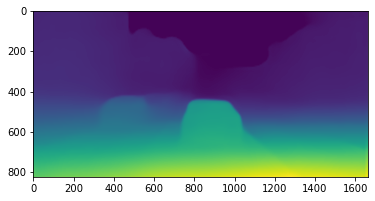

In [5]:
# INFERENCE
with torch.no_grad():
    prediction = midas(input_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

output = prediction.cpu().numpy()
plt.imshow(output)